# Lending Club Loan Data
These files contain complete loan data for all loans issued in 2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information.
The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.
Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. 
The file is a matrix of about 420 thousand observations and 75 variables.
A data dictionary is provided in a separate file.

Dataset is taken from Kaggle.

# 1. Data Cleaning

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df_loan = pd.read_csv('loan.csv',parse_dates=['issue_d','earliest_cr_line','next_pymnt_d','last_pymnt_d'])
df_loan.info()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
id                             421094 non-null int64
member_id                      421094 non-null int64
loan_amnt                      421094 non-null int64
funded_amnt                    421094 non-null int64
funded_amnt_inv                421094 non-null int64
term                           421094 non-null object
int_rate                       421094 non-null float64
installment                    421094 non-null float64
grade                          421094 non-null object
sub_grade                      421094 non-null object
emp_title                      397220 non-null object
emp_length                     421094 non-null object
home_ownership                 421094 non-null object
annual_inc                     421094 non-null float64
verification_status            421094 non-null object
issue_d                        421094 non-null object
loan_status                

In [50]:
#Remvoing columns that have very high null values
print(df_loan.shape)
print(df_loan.isnull().sum())

(421094, 74)
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23874
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           421049
purpose                             0
title                             132
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0

In [51]:
#Remvoing columns that have very high null values
#title and purpose are the same column so drop title, url is not important column drop that
#remove Nas from last_pymnt_d and last_credit_pull_d
#drop zip_code because its categorical column, doing OHE -> curse of Dimensionality
to_remove=['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog','mths_since_last_record','desc','emp_title','mths_since_last_delinq','next_pymnt_d','title','member_id','url','zip_code']
df = df_loan.drop(to_remove,axis=1)

In [52]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())

(421094, 47)
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')
id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0


In [53]:
df1 = df.dropna(how='any',axis=0) #It will erase every row (axis=0) that has "any" Null value in it.
df1.shape

(420921, 47)

In [54]:
df1.isnull().sum() #notice that on dropping NAs in tot_coll_amt also resulted in removing NAs of total_rev_hi_lim and tot_cur_bal

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [55]:
print(df1.application_type.value_counts())
print(df1.home_ownership.value_counts())
print(df1.purpose.value_counts())

INDIVIDUAL    420410
JOINT            511
Name: application_type, dtype: int64
MORTGAGE    207601
RENT        167579
OWN          45739
ANY              2
Name: home_ownership, dtype: int64
debt_consolidation    249940
credit_card           102006
home_improvement       25260
other                  19183
major_purchase          7444
medical                 3933
car                     3464
small_business          3362
moving                  2419
vacation                2244
house                   1437
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64


In [56]:
#we can see that most of the application types are Individual , so drop Joint application types
df1 = df1[df1.application_type != 'JOINT']

In [57]:
#now drop column application type since it only has individual 
df1.drop('application_type',axis=1,inplace=True)
#now drop ANY level of ownership type since it has only 2 values
df1 = df1[df1.home_ownership != 'ANY']

In [58]:
print(df1.home_ownership.value_counts())
print(df1.purpose.value_counts())

MORTGAGE    207247
RENT        167457
OWN          45704
Name: home_ownership, dtype: int64
debt_consolidation    249605
credit_card           101891
home_improvement       25234
other                  19155
major_purchase          7442
medical                 3931
car                     3463
small_business          3360
moving                  2418
vacation                2243
house                   1437
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64


In [59]:
dictr = {'educational':'other',
        'renewable_energy':'other',
        'wedding':'other',
         'house':'other',
         'vacation':'other',
         'moving':'other'
        }

In [60]:
#We can delete the levels which have less values and combine them with other. This will result in less columns being generated
#in OHE
df1.purpose = df1.purpose.replace(dictr)

In [61]:
print(df1.home_ownership.value_counts())
print(df1.purpose.value_counts())

MORTGAGE    207247
RENT        167457
OWN          45704
Name: home_ownership, dtype: int64
debt_consolidation    249605
credit_card           101891
other                  25482
home_improvement       25234
major_purchase          7442
medical                 3931
car                     3463
small_business          3360
Name: purpose, dtype: int64


In [62]:
print(df1.policy_code.value_counts())
print(df1.initial_list_status.value_counts())
print(df1.pymnt_plan.value_counts())

1    420408
Name: policy_code, dtype: int64
w    266793
f    153615
Name: initial_list_status, dtype: int64
n    420407
y         1
Name: pymnt_plan, dtype: int64


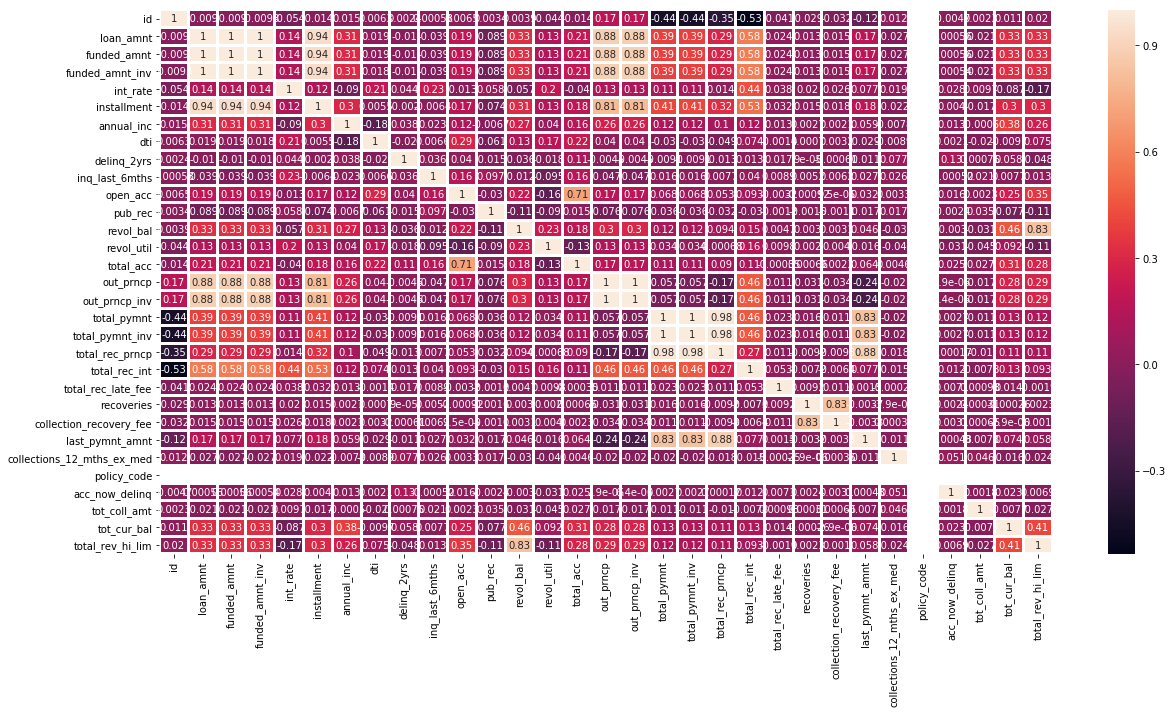

In [63]:
# Correlation between columns
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [66]:
#Removing co-related columns and policy_code
#remove earliest_cr_line as it has too many levels and its not important as per description
df1.drop(['total_acc','total_rec_int','tot_cur_bal','policy_code','funded_amnt', 'funded_amnt_inv','installment','earliest_cr_line','pymnt_plan','collection_recovery_fee','out_prncp','total_pymnt_inv','total_rec_prncp','out_prncp_inv','last_pymnt_amnt','total_rev_hi_lim'],axis=1,inplace=True)

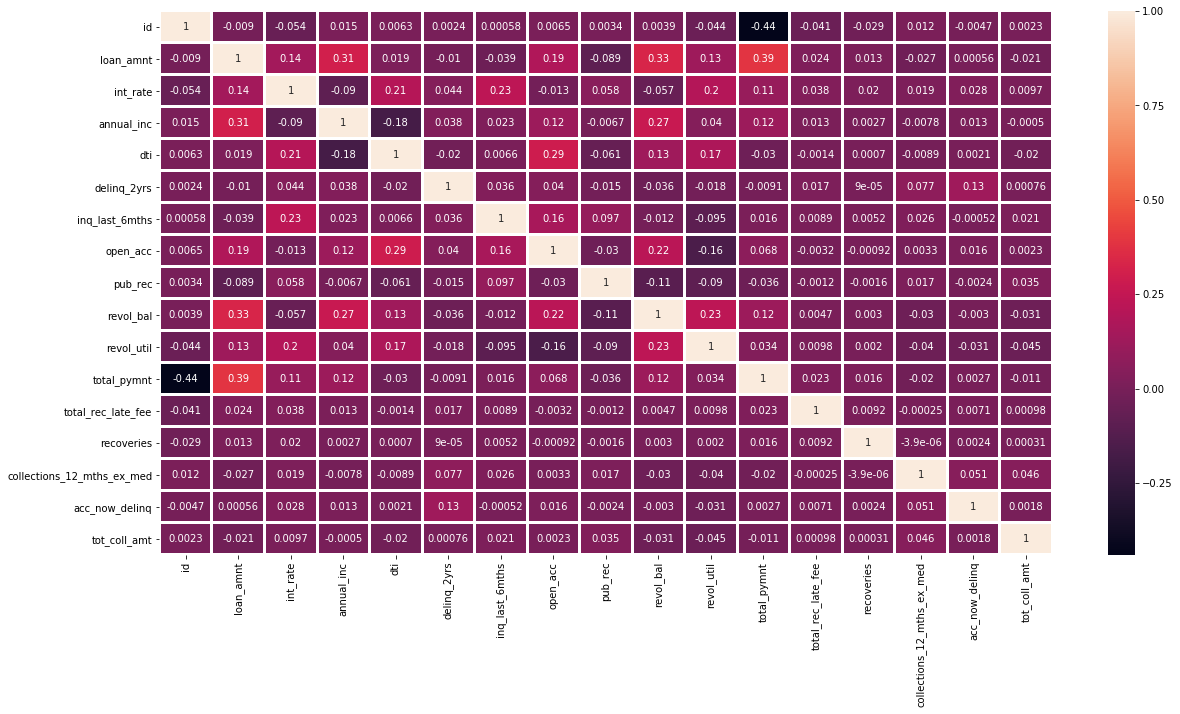

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [68]:
df1.describe()

id      loan_amnt       int_rate    annual_inc  \
count  4.204080e+05  420408.000000  420408.000000  4.204080e+05   
mean   5.391664e+07   15235.908213      12.597613  7.697905e+04   
std    9.471983e+06    8568.862007       4.316760  7.397686e+04   
min    5.670500e+04    1000.000000       5.320000  3.000000e+03   
25%    4.611759e+07    8500.000000       9.170000  4.612800e+04   
50%    5.534166e+07   14000.000000      12.290000  6.500000e+04   
75%    6.181241e+07   20000.000000      15.590000  9.180000e+04   
max    6.861706e+07   35000.000000      28.990000  9.500000e+06   

                 dti    delinq_2yrs  inq_last_6mths       open_acc  \
count  420408.000000  420408.000000   420408.000000  420408.000000   
mean       19.133300       0.347165        0.572763      11.952261   
std         8.657226       0.927272        0.867895       5.632477   
min         0.000000       0.000000        0.000000       1.000000   
25%        12.590000       0.000000        0.000000       8.000000   
50%        18.590000       0.000000        0.000000      11.000000   
75%        25.330000       0.000000        1.000000      15.000000   
max        39.990000      39.000000        6.000000      90.000000   

             pub_rec     revol_bal     revol_util    total_pymnt  \
count  420408.000000  4.204080e+05  420408.000000  420408.000000   
mean        0.233768  1.769063e+04      53.829234    3152.740998   
std         0.649904  2.419396e+04      23.886040    4233.389447   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.484000e+03      36.000000     857.200000   
50%         0.000000  1.200000e+04      54.100000    1973.100000   
75%         0.000000  2.143100e+04      72.100000    3806.260000   
max        86.000000  2.904836e+06     193.000000   42786.530000   

       total_rec_late_fee     recoveries  collections_12_mths_ex_med  \
count       420408.000000  420408.000000               420408.000000   
mean             0.116086       2.266957                    0.020245   
std              2.089227     111.519277                    0.157500   
min              0.000000       0.000000                    0.000000   
25%              0.000000       0.000000                    0.000000   
50%              0.000000       0.000000                    0.000000   
75%              0.000000       0.000000                    0.000000   
max            169.050000   26308.470000                   14.000000   

       acc_now_delinq   tot_coll_amt  
count   420408.000000  420408.000000  
mean         0.006089     257.553772  
std          0.086511    2241.954349  
min          0.000000       0.000000  
25%          0.000000       0.000000  
50%          0.000000       0.000000  
75%          0.000000       0.000000  
max         14.000000  496651.000000

In [69]:
print(df1.emp_length.value_counts()) 

10+ years    141294
2 years       37441
< 1 year      34281
3 years       33386
1 year        27430
5 years       24903
4 years       24469
n/a           23753
8 years       21521
7 years       18386
6 years       16809
9 years       16735
Name: emp_length, dtype: int64


In [70]:
df1.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'total_pymnt', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')

### Using KNN for missing emp_length Imputation

In [46]:
numerical_columns1 = ['loan_amnt','int_rate','emp_length','annual_inc','dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc','total_pymnt', 'total_rec_int','total_rec_late_fee', 'recoveries','collections_12_mths_ex_med','acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']
dataset = df1.loc[:,numerical_columns1]

In [47]:
#Imputing NA's of emp_length
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn import metrics as sm

test_df = dataset[dataset.emp_length == 'n/a']
dataset = dataset[dataset.emp_length != 'n/a']
train = dataset.loc[:,~dataset.columns.isin(['emp_length'])]
test = dataset.loc[:,'emp_length']

In [48]:
test_df.drop('emp_length',axis=1,inplace=True) #dropping this column as we will be imputing this

In [49]:
print("Start of training KNN {0}".format(datetime.datetime.now()))
train_sc = scale(train)
print("End of training KNN {0}".format(datetime.datetime.now()))
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(train_sc,test,test_size=0.3,random_state=25)
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier().fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
knn

Start of training KNN 2019-02-18 17:35:18.909780
End of training KNN 2019-02-18 17:35:19.366354
Start of Fitting KNN  2019-02-18 17:35:19.815487
End of Fitting KNN  2019-02-18 17:45:06.968409


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of prediction KNN  2019-02-18 18:00:00.647019
End of prediction KNN  2019-02-18 18:38:36.337674


0.28108271637100096

In [51]:
print(sm.classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       0.18      0.30      0.22     18519
         10       0.39      0.61      0.48     42600
          2       0.11      0.06      0.08     11154
          3       0.09      0.04      0.06      9877
          4       0.07      0.02      0.03      7372
          5       0.06      0.02      0.03      7547
          6       0.04      0.01      0.01      4998
          7       0.05      0.01      0.02      5566
          8       0.06      0.02      0.03      6453
          9       0.04      0.01      0.01      4911

avg / total       0.20      0.28      0.23    118997



In [143]:
dataset.drop(['total_acc','total_rec_int','tot_cur_bal'],axis=1,inplace=True)
train = dataset.loc[:,~dataset.columns.isin(['emp_length'])]
test = dataset.loc[:,'emp_length']
print("Start of scaling KNN {0}".format(datetime.datetime.now()))
train_sc = scale(train)
print("End of scaling KNN {0}".format(datetime.datetime.now()))
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(train_sc,test,test_size=0.3,random_state=25)

Start of scaling KNN 2019-02-19 11:33:13.680356
End of scaling KNN 2019-02-19 11:33:14.017755


In [142]:
dataset.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')

In [144]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=11).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of Fitting KNN  2019-02-19 11:33:37.651253
End of Fitting KNN  2019-02-19 11:45:32.841666
Start of prediction KNN  2019-02-19 11:45:32.841666
End of prediction KNN  2019-02-19 12:24:38.188589


0.30874727934317669

In [145]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=25).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of Fitting KNN  2019-02-19 12:55:43.482652
End of Fitting KNN  2019-02-19 13:05:15.205882
Start of prediction KNN  2019-02-19 13:05:15.205882
End of prediction KNN  2019-02-19 14:31:31.688765


0.34698353740010252

In [149]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=71).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of Fitting KNN  2019-02-19 16:40:25.915796
End of Fitting KNN  2019-02-19 17:12:00.869061
Start of prediction KNN  2019-02-19 17:12:00.871526
End of prediction KNN  2019-02-19 18:56:25.312368


0.3620259334268931

### We can see KNN performed really bad.
It is a very time consuming process and it can be critical in data mining where large databases are being extracted.
In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. 
KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance.

In [71]:
df2 = df1.copy()

## Checking for Outliers

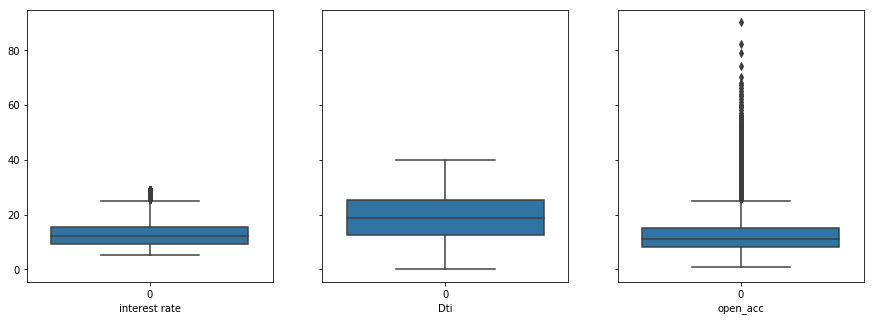

In [56]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df2.int_rate,ax=ax1)
g2.set_xlabel("interest rate")
g4 = sns.boxplot(data=df2.dti,ax=ax2)
g4.set_xlabel("Dti")
g7 = sns.boxplot(data=df2.open_acc,ax=ax3)
g7.set_xlabel("open_acc")

plt.show()

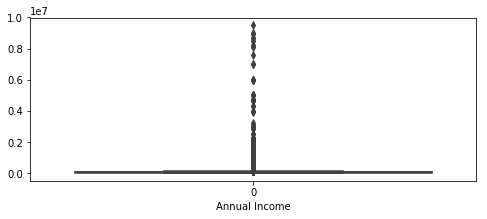

In [57]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g3 = sns.boxplot(data=df2.annual_inc,ax=ax1)
g3.set_xlabel("Annual Income")
plt.show()

Text(0.5, 0, 'loan amount')

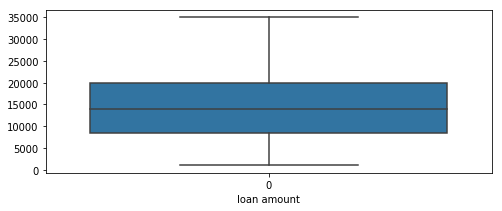

In [58]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g1 = sns.boxplot(data=df2.loan_amnt,ax=ax1)
g1.set_xlabel("loan amount")

Text(0.5, 0, 'delinq_2yrs')

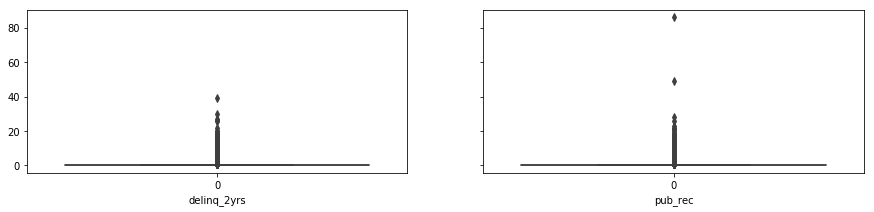

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2.pub_rec,ax=ax2)
g8.set_xlabel("pub_rec")
g5 = sns.boxplot(data=df2.delinq_2yrs,ax=ax1)
g5.set_xlabel("delinq_2yrs")

Text(0.5, 0, 'Revol Bal')

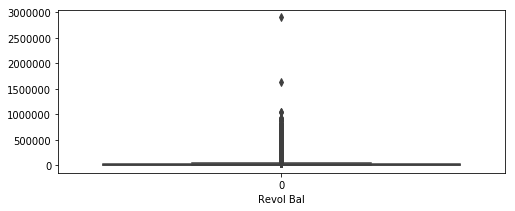

In [60]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2.revol_bal,ax=ax1)
g8.set_xlabel("Revol Bal")

Text(0.5, 0, 'Revol Util')

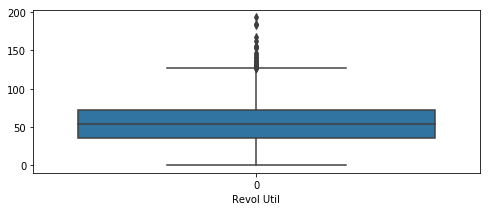

In [61]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.revol_util,ax=ax1)
g5.set_xlabel("Revol Util")

Text(0.5, 0, 'Total Payment')

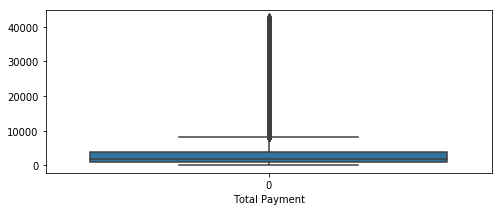

In [62]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.total_pymnt,ax=ax1)
g5.set_xlabel("Total Payment")

Text(0.5, 0, 'Total Recd Late fee')

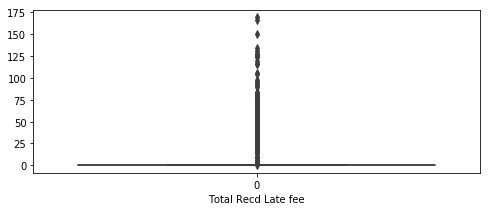

In [63]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.total_rec_late_fee,ax=ax1)
g5.set_xlabel("Total Recd Late fee")

Text(0.5, 0, 'Recoveries')

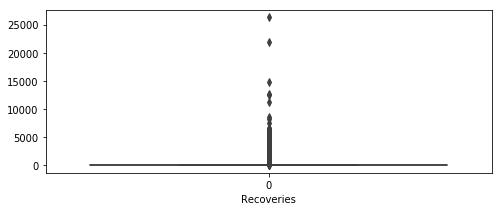

In [64]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.recoveries,ax=ax1)
g5.set_xlabel("Recoveries")

Text(0.5, 0, 'acc_now_delinq')

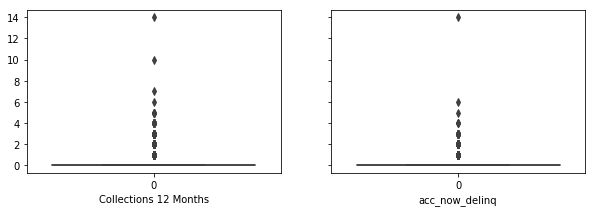

In [65]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.collections_12_mths_ex_med,ax=ax1)
g5.set_xlabel("Collections 12 Months")
g6 = sns.boxplot(data=df2.acc_now_delinq,ax=ax2)
g6.set_xlabel("acc_now_delinq")

Text(0.5, 0, 'tot_coll_amt')

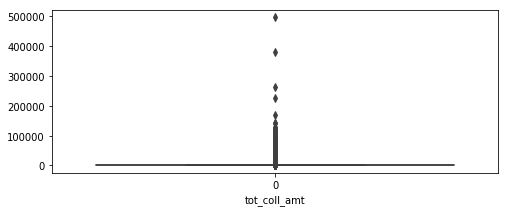

In [66]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.tot_coll_amt,ax=ax1)
g5.set_xlabel("tot_coll_amt")

## Outliers Detection

In [111]:
#Calculating percentage of outliers
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR.keys())
IQR.values

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')


array([  1.56948158e+07,   1.15000000e+04,   6.42000000e+00,
         4.56720000e+04,   1.27400000e+01,   0.00000000e+00,
         1.00000000e+00,   7.00000000e+00,   0.00000000e+00,
         1.49470000e+04,   3.61000000e+01,   2.94906000e+03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [112]:
df_outlier_pct = pd.DataFrame(columns=['Colname','Pct'],data=None)

In [113]:
#Calculating percentage of Outliers in each Column
loc = 0
for col in IQR.keys():
    outlier_cnt = ((df2[col] < (Q1[col] - 1.5 * IQR[col])) | (df2[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    df_outlier_pct.loc[loc,'Colname'] = col
    df_outlier_pct.loc[loc,'Pct'] = outlier_cnt/len(df2[col])
    loc+=1

In [114]:
print("Outlier Percentage in the Dataset")
df_outlier_pct

#We can see columns like delinq_2yrs, tot_coll_amt and pub_rec have more than 5% of outliers 
#hence we cannot delete outliers from these columns- we will cap them
#for others we can delete the rows containing the outliers since percentage is less than 5%

Outlier Percentage in the Dataset


Colname          Pct
0                           id   0.00222403
1                    loan_amnt            0
2                     int_rate   0.00768539
3                   annual_inc    0.0451014
4                          dti            0
5                  delinq_2yrs      0.20673
6               inq_last_6mths     0.040513
7                     open_acc    0.0257797
8                      pub_rec     0.176702
9                    revol_bal    0.0598252
10                  revol_util  8.56311e-05
11                 total_pymnt    0.0658622
12          total_rec_late_fee   0.00436481
13                  recoveries  0.000727864
14  collections_12_mths_ex_med    0.0184535
15              acc_now_delinq   0.00565879
16                tot_coll_amt      0.15768

In [115]:
#Remove ID since we dont want to remove rows of id column- ID is just a serial number column
df_outlier_pct.drop(df_outlier_pct.head(1).index, inplace=True)

In [116]:
df_outlier_pct

Colname          Pct
1                    loan_amnt            0
2                     int_rate   0.00768539
3                   annual_inc    0.0451014
4                          dti            0
5                  delinq_2yrs      0.20673
6               inq_last_6mths     0.040513
7                     open_acc    0.0257797
8                      pub_rec     0.176702
9                    revol_bal    0.0598252
10                  revol_util  8.56311e-05
11                 total_pymnt    0.0658622
12          total_rec_late_fee   0.00436481
13                  recoveries  0.000727864
14  collections_12_mths_ex_med    0.0184535
15              acc_now_delinq   0.00565879
16                tot_coll_amt      0.15768

In [161]:
df2_out = df2.copy()

In [119]:
print(df2_out.collections_12_mths_ex_med.value_counts())
print(df2_out.tot_coll_amt.value_counts())
print(df2_out.acc_now_delinq.value_counts())
print(df2_out.total_pymnt.value_counts())
print(df2_out.total_rec_late_fee.value_counts())
print(df2_out.pub_rec.value_counts())
print(df2_out.open_acc.value_counts())
print(df2_out.inq_last_6mths.value_counts())
print(df2_out.delinq_2yrs.value_counts())

0     412650
1       7153
2        510
3         69
4         16
5          6
14         1
10         1
7          1
6          1
Name: collections_12_mths_ex_med, dtype: int64
0        354118
50          916
100         707
75          527
200         404
150         402
60          382
70          335
80          326
250         273
65          270
55          260
90          254
85          235
125         217
95          209
300         205
66          204
67          202
99          201
61          198
51          197
56          197
78          195
64          193
79          192
63          192
96          189
71          186
74          184
          ...  
21374         1
11377         1
8567          1
5859          1
7906          1
3445          1
5494          1
32379         1
3808          1
6006          1
12260         1
6263          1
4214          1
45044         1
24959         1
6768          1
10870         1
7024          1
6625          1
15220         1
17275  

In [162]:
df2_out.recoveries.value_counts()

0.00       420102
1053.50         2
1000.00         2
2359.18         1
2345.40         1
2296.66         1
2287.99         1
2284.36         1
2273.28         1
2098.90         1
2245.76         1
2243.86         1
2235.04         1
2367.75         1
2228.69         1
2176.12         1
2134.77         1
2103.98         1
2262.61         1
2081.86         1
2448.46         1
1931.82         1
1807.09         1
1817.30         1
1819.35         1
1832.63         1
1844.09         1
1860.50         1
1889.82         1
1939.32         1
            ...  
4683.56         1
4742.91         1
4836.81         1
4850.28         1
4877.96         1
4894.68         1
4934.60         1
4958.04         1
4988.30         1
5008.00         1
4527.17         1
4433.99         1
4128.70         1
4423.25         1
4180.91         1
4185.14         1
4199.27         1
4218.83         1
4236.70         1
4280.05         1
4293.08         1
4309.18         1
4329.46         1
4330.99         1
4339.99   

#### Inference 
We can see that columns like collections_12_mths_ex_med,tot_coll_amt,acc_now_delinq,total_pymnt,total_rec_late_fee,recoveries 
have most of the values 0. So deleting these columns wont make an impact as such. We will delete these columns


In [163]:
### Deleting the columns
df2_out.drop(['collections_12_mths_ex_med','tot_coll_amt','acc_now_delinq','total_pymnt','total_rec_late_fee','recoveries'],axis=1,inplace=True)

In [122]:
print(df2_out.pub_rec.value_counts())
print(df2_out.open_acc.value_counts())
print(df2_out.inq_last_6mths.value_counts())
print(df2_out.delinq_2yrs.value_counts())

0     346121
1      60114
2       9209
3       2873
4       1041
5        481
6        249
7        108
8         84
9         34
10        29
11        15
12        14
13        10
15         5
16         4
18         3
21         3
17         2
49         1
14         1
19         1
20         1
22         1
23         1
26         1
28         1
86         1
Name: pub_rec, dtype: int64
9     36212
10    35759
8     34620
11    33111
7     30227
12    30070
13    26803
6     25065
14    23051
15    19531
5     18166
16    16484
17    13856
18    11449
4     10747
19     9620
20     7801
21     6314
22     5205
23     4166
3      4086
24     3417
25     2764
26     2087
27     1757
28     1354
29     1125
2       966
30      844
31      689
      ...  
44       34
46       32
45       30
48       26
47       24
49       15
51       12
52       11
53       11
50        9
55        6
56        6
54        3
59        2
60        2
74        1
68        1
70        1
82        1
79      

#### Inference
1. Not removing outliers from inq_last_6mths (has values from 0-6 and it makes sense to have them)
2. Not removing outliers from delinq_2yrs (has values from 0-39), we can however update row with delinq_2yrs = 39,30 with 27.
3. Not deleting rows since this is an important column in finding a default customer and we dont want to lose this imp. data    Note only 2 rows will be updated
4. We will update open_acc values with greater than 50 = 50 since there are only 24 values with greater than 50 
5. We will udpate pub_rec =86 with 28 since others are in the range 0-28. 

In [184]:
df2_out.delinq_2yrs[df2_out.delinq_2yrs >29] = 27

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [186]:
df2_out.open_acc[df2_out.open_acc >50] = 50
df2_out.pub_rec[df2_out.pub_rec > 28] = 28

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Capping Outliers of annual_income, int_rate, revol_util and revol_bal

In [174]:
#capping outliers
out_cols = ['int_rate','annual_inc','revol_bal','revol_util']
for col in out_cols:
    percentiles = df2_out[col].quantile([0.05,0.95]).values
    df2_out[col][df2_out[col] <= percentiles[0]] = percentiles[0]
    df2_out[col][df2_out[col] >= percentiles[1]] = percentiles[1]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 0, 'Revol Util')

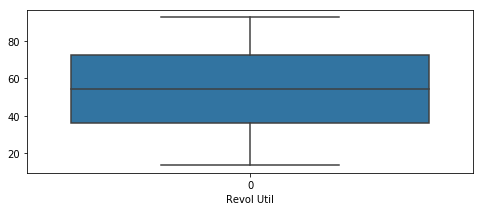

In [175]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2_out.revol_util,ax=ax1)
g5.set_xlabel("Revol Util")

Text(0.5, 0, 'Revol Bal')

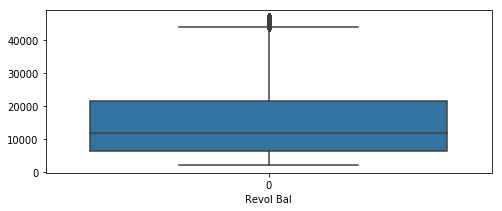

In [173]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2_out.revol_bal,ax=ax1)
g8.set_xlabel("Revol Bal")

Text(0.5, 0, 'delinq_2yrs')

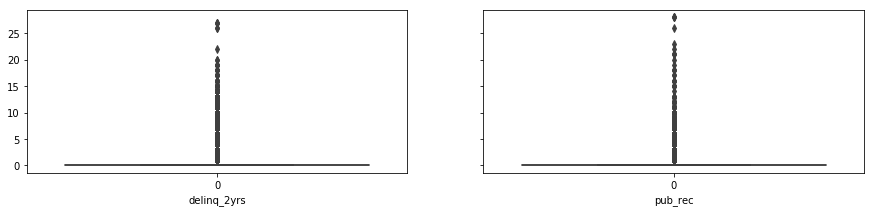

In [187]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2_out.pub_rec,ax=ax2)
g8.set_xlabel("pub_rec")
g5 = sns.boxplot(data=df2_out.delinq_2yrs,ax=ax1)
g5.set_xlabel("delinq_2yrs")

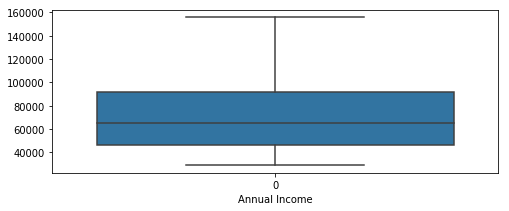

In [178]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g3 = sns.boxplot(data=df2_out.annual_inc,ax=ax1)
g3.set_xlabel("Annual Income")
plt.show()

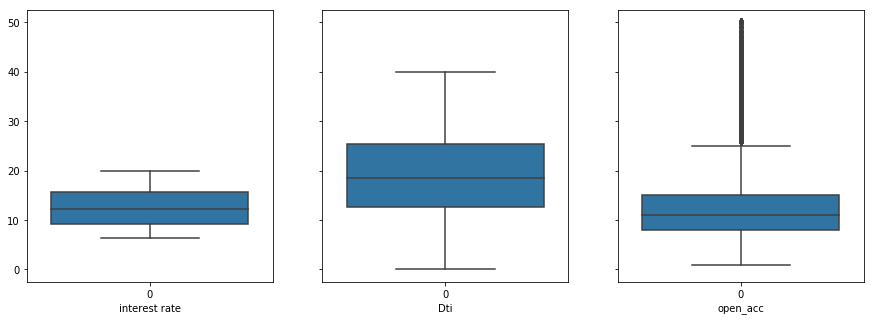

In [188]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df2_out.int_rate,ax=ax1)
g2.set_xlabel("interest rate")
g4 = sns.boxplot(data=df2_out.dti,ax=ax2)
g4.set_xlabel("Dti")
g7 = sns.boxplot(data=df2_out.open_acc,ax=ax3)
g7.set_xlabel("open_acc")

plt.show()

Text(0.5, 0, 'loan amount')

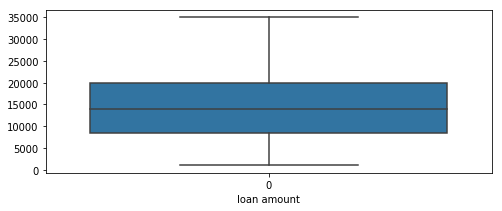

In [180]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g1 = sns.boxplot(data=df2.loan_amnt,ax=ax1)
g1.set_xlabel("loan amount")

In [189]:
#Saving this file for backup
df2_out.to_csv('df2_out.csv',index=False)

In [231]:
# creating a new column default
dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df2_out['default'] = df2_out['loan_status'].replace(dict_default_mapping)
df2_out.columns
df2_out['default'] = df2_out['default'].astype('category')
df2_out['default'].value_counts()

No     408323
Yes     12085
Name: default, dtype: int64

## Exploratory Data Analysis

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


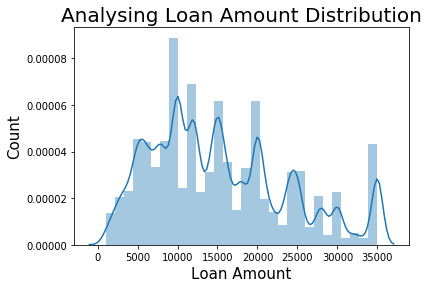

In [190]:
#distribution of loan amount
g = sns.distplot(df2_out['loan_amnt'],bins=30)
g.set_xlabel("Loan Amount", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Analysing Loan Amount Distribution", fontsize=20)
g

#### Inference
We can see there are peaks at series of 5000 and that makes sense since we normally apply for loan in factors of 5000

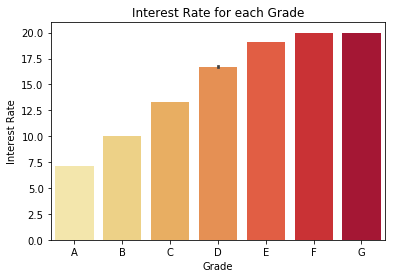

In [301]:
pairs = zip(df2_out['grade'], df2_out['int_rate']) # zip with features_list
pairs= sorted(pairs,reverse= False)
newx, newy = zip(*pairs)
g = sns.barplot(x=newx, y=newy,palette='YlOrRd') #hu,Set1,coolwarm,OrRd,dark - palette options
g.set_xlabel("Grade") 
g.set_ylabel("Interest Rate")
g.set_title("Interest Rate for each Grade")

#### Inference
We can see that as grade increases, interest rate increases.

In [298]:
pd.crosstab(df2_out['default'], df_loan['grade'])

#### Inference
We can see that as the grade increases the chances of being a default increases.

Text(0.5, 1.0, 'Distribution of default by Purpose')

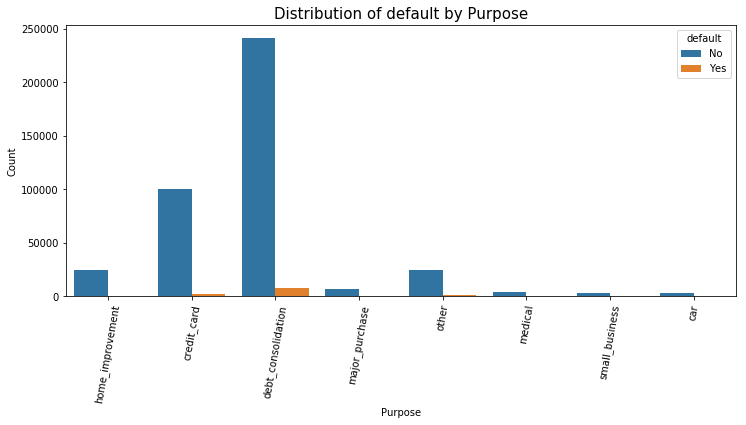

In [284]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
g = sns.countplot('purpose',data=df2_out,hue='default')
g.set_xticklabels(g.get_xticklabels(),rotation=80)
g.set_xlabel("Purpose")
g.set_ylabel("Count")
g.set_title("Distribution of default by Purpose",fontsize=15)

#### Inference
We can see that most of the defaulters are belonging to debt_consolidadtion category.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[]

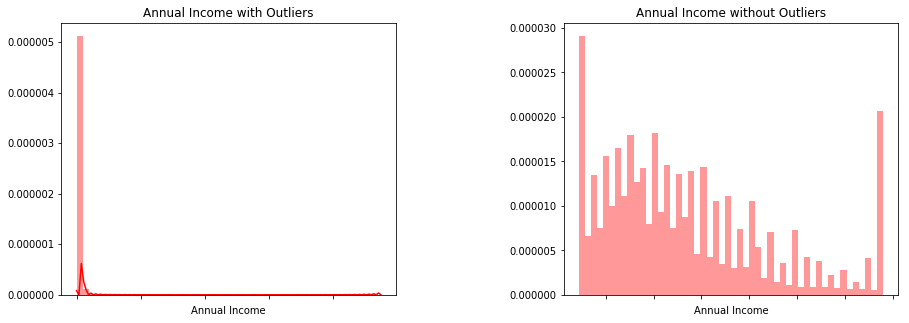

In [257]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
g1 = sns.distplot(df2['annual_inc'],ax=ax1,color='red')
g1.set_xlabel('Annual Income')
g1.set_title('Annual Income with Outliers')
g1.set_xticklabels("")
g2 = sns.distplot(df2_out['annual_inc'],ax=ax2,norm_hist=True,kde=False,color='red')
g2.set_xlabel('Annual Income')
g2.set_title('Annual Income without Outliers')
g2.set_xticklabels("")

### Loan status description
1. Fully Paid: Loan has been fully repaid, either at the expiration of the 3 or 5 year term or as a result of a repayment.
2. Current: Loan is up to date on all outstanding payments.
3. Does not meet the credit policy. Status:Fully Paid: No explanation but see “fully paid”.
4. Issued: New loan that has passed all Lending Club reviews, received full funding, and has been issued.
5. Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Learn more about the difference between default and charged off.
6. Does not meet the credit policy. Status:Charged Off: No explanation but see “Charged Off”
7. Late (31-120 days): Loan has not been current for 31 to 120 days.
8. In Grace Period: Loan is past due but within the 15-day grace period.
9. Late (16-30 days): Loan has not been current for 16 to 30 days.
10. Default: Loan has not been current for 121 days or more.

Text(0.5, 1.0, 'Loan Status Count')

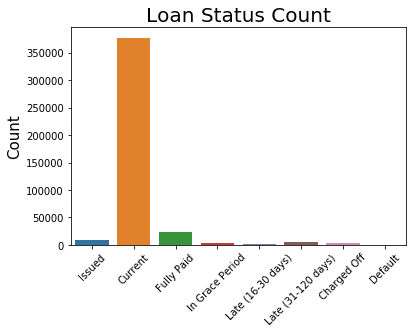

In [302]:
g = sns.countplot(x="loan_status", data=df2_out)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

#### Inference
We can see that the number of default loans are very less.
This dataset is skewed and hence sampling techiques need to be applied

Text(0.5, 1.0, 'Employeement length Count')

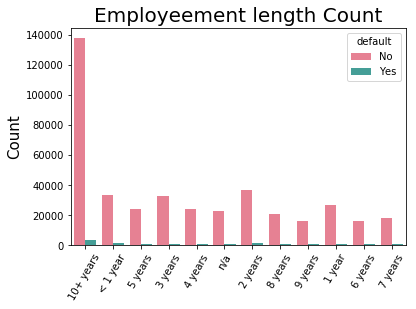

In [317]:
g = sns.countplot(x="emp_length", data=df2_out,palette='husl',hue='default')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Employeement length Count", fontsize=20)

Text(0.5, 1.0, 'Default')

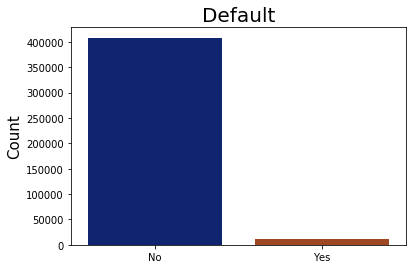

In [120]:
import seaborn as sns
%matplotlib inline
g = sns.countplot(x="default",data=df2_out,palette='dark')
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title('Default',fontsize=20)

In [121]:
df2_out.groupby('default').mean()

id     loan_amnt   int_rate    annual_inc        dti  \
default                                                                   
No       5.410080e+07  15227.011582  12.409565  73242.433452  19.087685   
Yes      4.769437e+07  15536.503930  15.253050  69046.831698  20.674533   

         delinq_2yrs  inq_last_6mths   open_acc   pub_rec     revol_bal  \
default                                                                   
No          0.344543        0.566500  11.957874  0.233212  15796.754011   
Yes         0.434506        0.784361  11.724617  0.246007  14332.201324   

         revol_util  
default              
No        53.848517  
Yes       56.856268

The average int_rate of customers who were default is more than that of who were not default
The average annual income of customers who were default is lower than that who were not default
The average number of inquires for default customers is comparitively more than that of non default
The average revolving utilization of defaulters is more compared to non defaulters 


In [122]:
df2_out.groupby('emp_length').mean()

id     loan_amnt   int_rate    annual_inc        dti  \
emp_length                                                                   
1 year      5.402112e+07  14343.690303  12.574295  69480.863720  18.658418   
10+ years   5.394736e+07  16445.252629  12.399011  79234.186559  19.374253   
2 years     5.379600e+07  14603.644401  12.520082  71072.659176  18.646819   
3 years     5.389829e+07  14710.911011  12.503719  71360.139009  18.733059   
4 years     5.384299e+07  14893.161756  12.545539  72366.047183  18.975865   
5 years     5.407511e+07  14983.646549  12.497221  72560.663334  18.976231   
6 years     5.367001e+07  15283.974359  12.561867  73243.393977  19.125535   
7 years     5.289793e+07  15231.355379  12.591154  72941.680125  19.279436   
8 years     5.397042e+07  15443.738674  12.515832  73958.483998  19.248535   
9 years     5.383621e+07  15596.142814  12.525578  73719.273740  19.443199   
< 1 year    5.414621e+07  14525.709577  12.538609  69714.109054  18.475722   
n/a         5.437866e+07  11976.957647  12.577717  51832.860449  20.423300   

            delinq_2yrs  inq_last_6mths   open_acc   pub_rec     revol_bal  \
emp_length                                                                   
1 year         0.359898        0.572840  11.784725  0.194276  14128.853008   
10+ years      0.391715        0.570767  12.312844  0.241709  18025.751794   
2 years        0.367191        0.571432  11.825646  0.203814  14185.096445   
3 years        0.323489        0.581711  11.850027  0.214701  14348.489097   
4 years        0.299440        0.588050  11.918100  0.231967  14543.970861   
5 years        0.310324        0.568727  11.841264  0.245794  14737.162591   
6 years        0.321316        0.577786  11.960676  0.244155  15137.186805   
7 years        0.309638        0.564016  11.975851  0.239639  15372.021538   
8 years        0.322104        0.582965  12.049719  0.243623  15625.179127   
9 years        0.326501        0.541022  11.967493  0.226352  16153.423065   
< 1 year       0.325282        0.572941  11.800764  0.192322  14521.419183   
n/a            0.272513        0.578622  10.571717  0.336294  13236.308929   

            revol_util  
emp_length              
1 year       53.639913  
10+ years    55.067057  
2 years      53.086702  
3 years      53.272773  
4 years      53.260881  
5 years      52.856367  
6 years      53.593307  
7 years      54.177358  
8 years      53.814474  
9 years      54.398171  
< 1 year     54.551749  
n/a          50.581556

In [127]:
import matplotlib as plt
pd.crosstab(df2_out.emp_length,df2_out.default)

default         No   Yes
emp_length              
1 year       26524   906
10+ years   137751  3543
2 years      36345  1096
3 years      32383  1003
4 years      23693   776
5 years      24176   727
6 years      16283   526
7 years      17821   565
8 years      20943   578
9 years      16274   461
< 1 year     33129  1152
n/a          23001   752

### Handling Skewed Data

1. Stratified cross validation to make sure you end up with enough positives in the test.
2. Under/over sampling as others have mentioned or roughly balanced bagging for random forests. 
   There are also methods for generating new minority class samples and sampling representative majority class samples.
3. Class weighted or cost sensitive learning can work well and there are versions of many methods that can do this (though not      in scikit learn).
4. Boosting (gradient or adaptive) can work well.

### Class Weights using Logistic Regression

In [22]:
df2_out = pd.read_csv('df2_out.csv')
df2_out.head()

id  loan_amnt        term  int_rate grade sub_grade emp_length  \
0  68444620      35000   60 months     11.99     C        C1  10+ years   
1  68547583       8650   36 months      6.39     A        A1   < 1 year   
2  67849662       4225   36 months     14.85     C        C5    5 years   
3  68506885      10000   60 months     11.99     C        C1  10+ years   
4  68416935      15000   36 months      9.80     B        B3    3 years   

  home_ownership  annual_inc verification_status         ...            dti  \
0       MORTGAGE    128000.0     Source Verified         ...           6.46   
1       MORTGAGE    100000.0        Not Verified         ...           7.28   
2           RENT     35000.0     Source Verified         ...          15.22   
3           RENT     42500.0        Not Verified         ...          31.04   
4       MORTGAGE     92000.0        Not Verified         ...          13.89   

  delinq_2yrs inq_last_6mths open_acc  pub_rec  revol_bal  revol_util  \
0           0              0       17        0      14277        27.4   
1           0              0       15        0       7158        26.7   
2           2              0        6        0       2114        24.6   
3           0              1       10        0       5812        40.9   
4           0              1        7        2      12703        35.2   

   initial_list_status  last_pymnt_d  last_credit_pull_d  
0                    w           NaN              Jan-16  
1                    w           NaN              Jan-16  
2                    w           NaN              Jan-16  
3                    w           NaN              Jan-16  
4                    w           NaN              Jan-16  

[5 rows x 24 columns]

In [29]:
df2_out.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
initial_list_status        0
last_pymnt_d           17135
last_credit_pull_d         0
dtype: int64

In [23]:
# creating a new column default
dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df2_out['default'] = df2_out['loan_status'].replace(dict_default_mapping)
df2_out.columns
df2_out['default'] = df2_out['default'].astype('category')
df2_out['default'].value_counts()

No     408323
Yes     12085
Name: default, dtype: int64

In [24]:
df3 = df2_out.drop(['last_credit_pull_d','last_pymnt_d','issue_d','loan_status'],axis=1)
df3.shape

(420408, 21)

In [26]:
X = df3.iloc[:,:-1]
y=df3.iloc[:,-1]

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder() #This gives numbering to Categorical Columns
X_encoded = X.apply(labelencoder.fit_transform)

In [29]:
X_encoded.emp_length.value_counts()
X_encoded.term.value_counts()
X_encoded.grade.value_counts()
X.emp_length.value_counts()

10+ years    141294
2 years       37441
< 1 year      34281
3 years       33386
1 year        27430
5 years       24903
4 years       24469
n/a           23753
8 years       21521
7 years       18386
6 years       16809
9 years       16735
Name: emp_length, dtype: int64

In [31]:
onehotencoder = OneHotEncoder(categorical_features = [2,4,5,6,7,9,10,18],sparse=False) #Doing OHE of categorical columns
X_ohe = onehotencoder.fit_transform(X_encoded).toarray()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [113]:
X_ohe

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.21630000e+04,   1.39000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   5.04400000e+03,   1.32000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.11000000e+02],
       ..., 
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   8.91700000e+03,   4.78000000e+02],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   6.14000000e+03,   1.71000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   3.09800000e+04,   6.63000000e+02]])

In [82]:
y_ohe = labelencoder.fit_transform(y)
np.count_nonzero(y_ohe)
y_ohe.shape

(420408,)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X_ohe,y_ohe,test_size=0.3,random_state=25,stratify=y)

In [85]:
x_test.shape

(126123, 83)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sm
logr = LogisticRegression().fit(x_train,y_train)
pred = logr.predict(x_test)
sm.accuracy_score(y_test,pred)

0.97111549836270938

In [94]:
print(sm.classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99    122497
          1       0.10      0.00      0.00      3626

avg / total       0.95      0.97      0.96    126123



In [99]:
logr = LogisticRegression(class_weight={1:25}).fit(x_train,y_train)
pred = logr.predict(x_test)
print(sm.accuracy_score(y_test,pred))
print(sm.classification_report(y_test,pred))

0.756420319846
             precision    recall  f1-score   support

          0       0.99      0.76      0.86    122497
          1       0.07      0.65      0.13      3626

avg / total       0.96      0.76      0.84    126123



### Using Dummy Variable for OHE

#### Logistic Regression Assumptions
Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.

In [1]:
import pandas as pd
import numpy as np
df2_out = pd.read_csv("df2_out.csv")

In [2]:
# creating a new column default
dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df2_out['default'] = df2_out['loan_status'].replace(dict_default_mapping)
df2_out.columns
df2_out['default'] = df2_out['default'].astype('category')
df2_out['default'].value_counts()

No     408323
Yes     12085
Name: default, dtype: int64

In [32]:
df_loan = df2_out.copy()
print(df_loan.default.dtype) #To change category you need to convert it to str first
df_loan.default = df_loan.default.astype(str)
df_loan['default'] = df_loan['default'].replace({'No':'0','Yes':'1'})
df_loan.default = df_loan.default.astype(int)
print(df_loan.default.value_counts())
print(df_loan.default.dtypes)

category
0    408323
1     12085
Name: default, dtype: int64
int32


In [33]:
X = df_loan.iloc[:,:-1]
y = df_loan.iloc[:,-1]
X.drop(['last_pymnt_d','last_credit_pull_d','issue_d','loan_status'],axis=1,inplace=True)
X.columns


Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status'],
      dtype='object')

In [16]:
pd.crosstab(df_loan.initial_list_status,df_loan.default)

default                   0     1
initial_list_status              
f                    147503  6112
w                    260820  5973

In [17]:
pd.crosstab(df_loan.verification_status,df_loan.default)

default                   0     1
verification_status              
Not Verified         115940  2415
Source Verified      174078  5279
Verified             118305  4391

In [34]:
#Removing addr since it will create many columns in OHE
X_logr =  X.drop(['addr_state'],axis=1)
X_dummy = pd.get_dummies(X_logr,drop_first=True,prefix_sep='_')
X_dummy.columns

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp

In [35]:
X_dummy.shape

(420408, 75)

### Implementing SMOTE for over sampling

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [37]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
print("length of oversampled data is ",len(os_data_X))
np.bincount(os_data_y)

length of oversampled data is  571632


array([285816, 285816], dtype=int64)

### Feature Selection

### 1. Recursive Feature Elimination (RFE)
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [45]:
import datetime
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # To supress warnings 
logr_model = LogisticRegression()
print("Start of RFE {0}".format(datetime.datetime.now()))
rfe = RFE(logr_model,50)
rfe.fit(os_data_X,os_data_y)
print("End of RFE {0}".format(datetime.datetime.now()))
print(rfe.support_)
print(rfe.ranking_)

Start of RFE 2019-02-25 15:32:03.997292
End of RFE 2019-02-25 15:34:43.825814
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True False  True False False False False
 False  True  True  True  True  True  True  True  True False False False
  True False  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  6 24 18 17 12  1  1  1  1  1  1  1  1  1  1  1  1  3  5  7 10 14
 15 21 25 23  4  1  2  1  8 13  9 20 22  1  1  1  1  1  1  1  1 26 16 19
  1 11  1]


In [46]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: x, rfe.ranking_), columns)))

Features sorted by their rank:
[(1, 'annual_inc'), (1, 'delinq_2yrs'), (1, 'dti'), (1, 'emp_length_2 years'), (1, 'emp_length_4 years'), (1, 'emp_length_< 1 year'), (1, 'emp_length_n/a'), (1, 'grade_B'), (1, 'grade_C'), (1, 'grade_D'), (1, 'grade_E'), (1, 'grade_F'), (1, 'grade_G'), (1, 'home_ownership_OWN'), (1, 'home_ownership_RENT'), (1, 'id'), (1, 'initial_list_status_w'), (1, 'inq_last_6mths'), (1, 'int_rate'), (1, 'loan_amnt'), (1, 'open_acc'), (1, 'pub_rec'), (1, 'purpose_credit_card'), (1, 'purpose_debt_consolidation'), (1, 'purpose_other'), (1, 'revol_bal'), (1, 'revol_util'), (1, 'sub_grade_A2'), (1, 'sub_grade_A3'), (1, 'sub_grade_A4'), (1, 'sub_grade_A5'), (1, 'sub_grade_B1'), (1, 'sub_grade_B2'), (1, 'sub_grade_B3'), (1, 'sub_grade_B4'), (1, 'sub_grade_C5'), (1, 'sub_grade_D1'), (1, 'sub_grade_D2'), (1, 'sub_grade_D3'), (1, 'sub_grade_D4'), (1, 'sub_grade_D5'), (1, 'sub_grade_E1'), (1, 'sub_grade_E2'), (1, 'sub_grade_E3'), (1, 'sub_grade_E4'), (1, 'sub_grade_E5'), (1, 'sub

#### Inference 
We can see aannual_inc,delinq_2yrs,dti,emp_length,grade,home_ownership,initial_list_status,inq_last_6mths,int_rate,loan_amnt,
open_acc,pub_rec,purpose,revol_bal,sub_grade,term,verification_status were highly important by the model

### 2 . Randomized Lasso

##### Stability selection
Stability selection is a relatively novel method for feature selection, based on subsampling in combination with selection algorithms (which could be regression, SVMs or other similar method). The high level idea is to apply a feature selection algorithm on different subsets of data and with different subsets of features. After repeating the process a number of times, the selection results can be aggregated, for example by checking how many times a feature ended up being selected as important when it was in an inspected feature subset. We can expect strong features to have scores close to 100%, since they are always selected when possible. Weaker, but still relevant features will also have non-zero scores, since they would be selected when stronger features are not present in the currently selected subset, while irrelevant features would have scores (close to) zero, since they would never be among selected features.

Sklearn implements stability selection in the randomized lasso and randomized logistics regression classes.

In [49]:
from sklearn.linear_model import RandomizedLasso
rlasso = RandomizedLasso()
print("Start of Rlasso {0}".format(datetime.datetime.now()))
rlasso.fit(os_data_X,os_data_y)
print("End of Rlasso {0}".format(datetime.datetime.now()))
print("Features sorted by their Score:")
print(sorted(zip(map(lambda x: x, rlasso.scores_), columns),reverse=True))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Start of Rlasso 2019-02-25 16:05:42.492396
End of Rlasso 2019-02-25 16:09:41.897597
Features sorted by their Score:
[(1.0, 'verification_status_Verified'), (1.0, 'verification_status_Source Verified'), (1.0, 'term_ 60 months'), (1.0, 'sub_grade_G5'), (1.0, 'sub_grade_F5'), (1.0, 'sub_grade_F4'), (1.0, 'sub_grade_E3'), (1.0, 'sub_grade_E1'), (1.0, 'sub_grade_D5'), (1.0, 'sub_grade_D4'), (1.0, 'sub_grade_D3'), (1.0, 'sub_grade_C2'), (1.0, 'sub_grade_C1'), (1.0, 'sub_grade_B2'), (1.0, 'sub_grade_B1'), (1.0, 'sub_grade_A4'), (1.0, 'revol_util'), (1.0, 'revol_bal'), (1.0, 'purpose_major_purchase'), (1.0, 'purpose_home_improvement'), (1.0, 'purpose_credit_card'), (1.0, 'pub_rec'), (1.0, 'open_acc'), (1.0, 'int_rate'), (1.0, 'inq_last_6mths'), (1.0, 'initial_list_status_w'), (1.0, 'id'), (1.0, 'home_ownership_RENT'), (1.0, 'home_ownership_OWN'), (1.0, 'grade_G'), (1.0, 'grade_F'), (1.0, 'emp_length_9 years'), (1.0, 'emp_length_8 years'), (1.0, 'emp_length_7 years'), (1.0, 'emp_length_5 years'

## Model Implementation

### Logistic Regression Model Fitting

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import numpy as np
logreg = LogisticRegression(random_state=7)
logreg.fit(os_data_X, os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.722128398468162

In [154]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84    122507
           1       0.04      0.37      0.07      3616

   micro avg       0.72      0.72      0.72    126123
   macro avg       0.51      0.55      0.45    126123
weighted avg       0.95      0.72      0.81    126123



In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#We have 89748 + 1329 correct predictions 

[[73256 49251]
 [ 1307  2309]]


In [71]:
#Just checking if we have not included any redundant columns 
os_data_X_df = pd.DataFrame(data=os_data_X,columns=columns)
os_data_X_df.columns


Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp

In [127]:
# Creating a new model with different features, removing subgrade
X_new = os_data_X_df[os_data_X_df.columns.drop(list(os_data_X_df.filter(regex='sub_grade')))]

In [164]:
X_new.drop('id',axis=1,inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [165]:
logreg_1 = LogisticRegression(random_state=7,C=0.01)
logreg_1.fit(X_new, os_data_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
X_test_new = X_test[X_test.columns.drop(list(X_test.filter(regex='sub_grade')))]
X_test_new.drop('id',axis=1,inplace=True)
y_pred1 = logreg_1.predict(X_test_new)
metrics.accuracy_score(y_test,y_pred1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.6080810002933644

In [168]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75    122507
           1       0.05      0.65      0.09      3616

   micro avg       0.61      0.61      0.61    126123
   macro avg       0.52      0.63      0.42    126123
weighted avg       0.96      0.61      0.73    126123



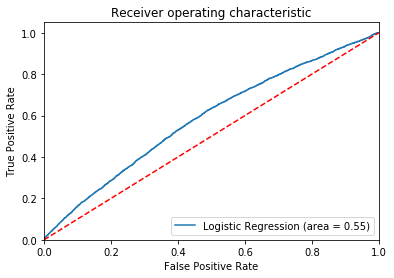

In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

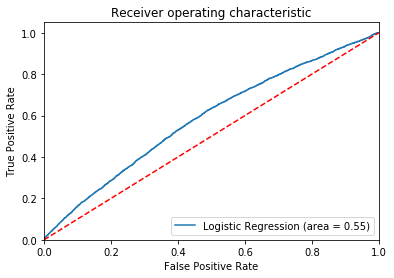

In [162]:
logit_roc_auc = roc_auc_score(y_test, logreg_1.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test, logreg_1.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [301]:
from sklearn.preprocessing import StandardScaler
X_filtered = X_logr.drop(['sub_grade','id'],axis=1)
grade_mapping={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_filtered["grade"] = X_filtered["grade"].replace(grade_mapping)
X_dummy1 = pd.get_dummies(X_filtered,drop_first=True,prefix_sep='_')
X_dummy1.columns
os1 = SMOTE(random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dummy1, y, test_size=0.3, random_state=0)
columns1 = X_train1.columns
os_data_X1,os_data_y1=os1.fit_sample(X_train1, y_train1)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(os_data_X1)
X_test_scaled = scalar.transform(X_test1)
logreg2 = LogisticRegression(random_state=7,penalty='l2',tol=0.0001,max_iter=200,solver='saga',class_weight='balanced')
#Not using L1 since we already have less features, and L1 takes long time 
#solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}, default: ‘liblinear’
logreg2.fit(X_train_scaled, os_data_y1)
y_pred2 = logreg2.predict(X_test_scaled)
print(metrics.accuracy_score(y_test1,y_pred2))
print(metrics.classification_report(y_test1,y_pred2))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


0.6584048904640708
              precision    recall  f1-score   support

           0       0.98      0.66      0.79    122507
           1       0.05      0.65      0.10      3616

   micro avg       0.66      0.66      0.66    126123
   macro avg       0.52      0.65      0.44    126123
weighted avg       0.96      0.66      0.77    126123



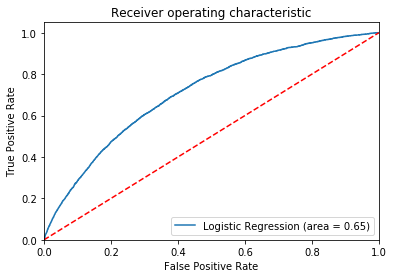

In [302]:
logit_roc_auc = roc_auc_score(y_test1, logreg2.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test1, logreg2.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Inference
We can see how after dropping sub_grade and id columns the AUC has increased from 0.55 to 0.65

In [182]:
from sklearn.linear_model import RandomizedLasso
rlasso = RandomizedLasso()
print("Start of Rlasso {0}".format(datetime.datetime.now()))
rlasso.fit(os_data_X1,os_data_y1)
print("End of Rlasso {0}".format(datetime.datetime.now()))
print("Features sorted by their Score:")
print(sorted(zip(map(lambda x: x, rlasso.scores_), X_dummy1.columns),reverse=True))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Start of Rlasso 2019-02-27 01:24:39.794282
End of Rlasso 2019-02-27 01:26:20.347282
Features sorted by their Score:
[(1.0, 'verification_status_Source Verified'), (1.0, 'term_ 60 months'), (1.0, 'revol_util'), (1.0, 'revol_bal'), (1.0, 'purpose_major_purchase'), (1.0, 'purpose_home_improvement'), (1.0, 'purpose_debt_consolidation'), (1.0, 'pub_rec'), (1.0, 'open_acc'), (1.0, 'loan_amnt'), (1.0, 'int_rate'), (1.0, 'inq_last_6mths'), (1.0, 'initial_list_status_w'), (1.0, 'home_ownership_RENT'), (1.0, 'home_ownership_OWN'), (1.0, 'grade_G'), (1.0, 'grade_F'), (1.0, 'grade_E'), (1.0, 'grade_B'), (1.0, 'emp_length_9 years'), (1.0, 'emp_length_8 years'), (1.0, 'emp_length_7 years'), (1.0, 'emp_length_6 years'), (1.0, 'emp_length_5 years'), (1.0, 'emp_length_3 years'), (1.0, 'emp_length_2 years'), (1.0, 'emp_length_10+ years'), (1.0, 'dti'), (1.0, 'delinq_2yrs'), (1.0, 'annual_inc'), (0.985, 'purpose_small_business'), (0.985, 'emp_length_4 years'), (0.98, 'purpose_credit_card'), (0.915, 'emp_

In [196]:
# Try converting emp length into numeric
print(X_filtered.emp_length.value_counts())
df2_out.groupby('default')['emp_length'].value_counts()

10+ years    141294
2 years       37441
< 1 year      34281
3 years       33386
1 year        27430
5 years       24903
4 years       24469
n/a           23753
8 years       21521
7 years       18386
6 years       16809
9 years       16735
Name: emp_length, dtype: int64


default  emp_length
No       10+ years     137751
         2 years        36345
         < 1 year       33129
         3 years        32383
         1 year         26524
         5 years        24176
         4 years        23693
         n/a            23001
         8 years        20943
         7 years        17821
         6 years        16283
         9 years        16274
Yes      10+ years       3543
         < 1 year        1152
         2 years         1096
         3 years         1003
         1 year           906
         4 years          776
         n/a              752
         5 years          727
         8 years          578
         7 years          565
         6 years          526
         9 years          461
Name: emp_length, dtype: int64

#### Trying to convert emp_length to numeric

In [203]:
emp_mapping={'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'1 year':1,'5 years':5,'4 years':4,'n/a':0,'8 years':8,'7 years':7,'6 years':6,'9 years':9}
X_filtered_emp =  X_logr.drop(['id','sub_grade'],axis=1)
X_filtered_emp['emp_length'] = X_filtered_emp['emp_length'].replace(emp_mapping)
grade_mapping={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_filtered_emp["grade"] = X_filtered_emp["grade"].replace(grade_mapping)
X_dummy2 = pd.get_dummies(X_filtered_emp,drop_first=True,prefix_sep='_')
columns2 = X_dummy2.columns
os2 = SMOTE(random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_dummy2, y, test_size=0.3, random_state=0)
columns2 = X_train2.columns
os_data_X2,os_data_y2=os2.fit_sample(X_train2, y_train2)
logreg3 = LogisticRegression(random_state=7)
logreg3.fit(os_data_X2, os_data_y2)
y_pred2 = logreg3.predict(X_test2)
print(metrics.accuracy_score(y_test2,y_pred2))
print(metrics.classification_report(y_test2,y_pred2))

0.6749205141013138
              precision    recall  f1-score   support

           0       0.98      0.68      0.80    122507
           1       0.05      0.62      0.10      3616

   micro avg       0.67      0.67      0.67    126123
   macro avg       0.52      0.65      0.45    126123
weighted avg       0.96      0.67      0.78    126123



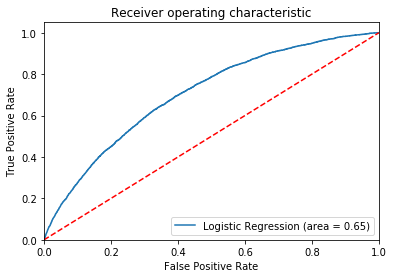

In [209]:
logit_roc_auc3 = roc_auc_score(y_test2, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [208]:
logreg3.predict_proba(X_test2)[:,1]

array([0.32301396, 0.48085345, 0.42320234, ..., 0.64873383, 0.32635189,
       0.27433418])

In [ ]:
### Trying to convert emp_length to numeric - removing n/a
X_filtered_empna = X_filtered[~X_filtered['emp_length'].isin('n/a')]
X_filtered_empna = X_filtered.emp_length.replace(emp_mapping)
X_filtered_empna.drop(['id','sub_grade'],axis=1,inplace=True)

#### C parameter
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
1. trying with different C params also gave the same results and on giving class_weights its not helping, infact worsens the results.

The trade-off parameter of logistic regression that determines the strength of the regularization is called C, and higher values of C correspond to less regularization (where we can specify the regularization function).C is actually the Inverse of regularization strength(lambda)

0.030922195000118932
              precision    recall  f1-score   support

           0       0.99      0.00      0.00    122507
           1       0.03      1.00      0.06      3616

   micro avg       0.03      0.03      0.03    126123
   macro avg       0.51      0.50      0.03    126123
weighted avg       0.96      0.03      0.01    126123



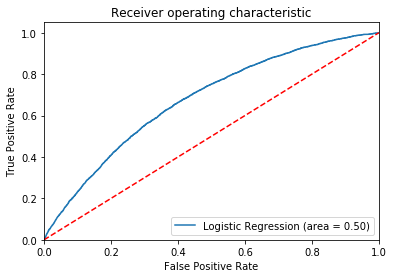

In [218]:
logreg2 = LogisticRegression(C=0.05,random_state=7)
logreg2.fit(os_data_X1, os_data_y1)
y_pred11 = logreg2.predict(X_test1)
print(metrics.accuracy_score(y_test1,y_pred11))
print(metrics.classification_report(y_test1,y_pred11))
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

training set score: 0.675193

test set score: 0.678893

training set score of lgr100: 0.676353

test set score of lgr100: 0.678901

training set score of lgr001: 0.675303

test set score of lgr001: 0.673882


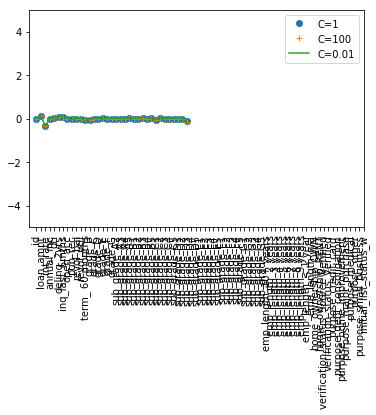

In [229]:
######default C=1#####
lgr=LogisticRegression().fit(os_data_X1,os_data_y1)
print("training set score: %f" % lgr.score(os_data_X1, os_data_y1))
print('\n'"test set score: %f" % lgr.score(X_test1, y_test1))
 
######increase C to 100#####
lgr100=LogisticRegression(C=100).fit(os_data_X1,os_data_y1)
print('\n'"training set score of lgr100: %f" % lgr100.score(os_data_X1, os_data_y1))
print('\n'"test set score of lgr100: %f" % lgr100.score(X_test1, y_test1))
 
######decrease C to 0.01#####
lgr001=LogisticRegression(C=0.01).fit(os_data_X1,os_data_y1)
print('\n'"training set score of lgr001: %f" % lgr001.score(os_data_X1, os_data_y1))
print('\n'"test set score of lgr001: %f" % lgr001.score(X_test1, y_test1))

import matplotlib.pyplot as plt
plt.plot(lgr.coef_.T,'o',label='C=1')
plt.plot(lgr100.coef_.T,'+',label='C=100')
plt.plot(lgr001.coef_.T,'-',label='C=0.01')
plt.xticks(range(os_data_X_df.shape[1]),os_data_X_df.columns,rotation=90)
plt.ylim(-5,5)
#plt.xlim(0,60)
plt.legend()
plt.show()

## Decision Trees

In [256]:
print(X_filtered.columns)
y_dt = y.replace(to_replace={0:'No',1:'Yes'})
y_dt.value_counts()
y.dtypes

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status'],
      dtype='object')


dtype('int32')

In [291]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier().fit(X_train_scaled, os_data_y1)
prediction = dtree.predict(X_test_scaled)
print(metrics.accuracy_score(y_test1,prediction))
print(metrics.classification_report(y_test1,prediction))

0.9370455824869374
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    122507
           1       0.05      0.07      0.06      3616

   micro avg       0.94      0.94      0.94    126123
   macro avg       0.51      0.51      0.51    126123
weighted avg       0.95      0.94      0.94    126123



In [292]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5145583337083646

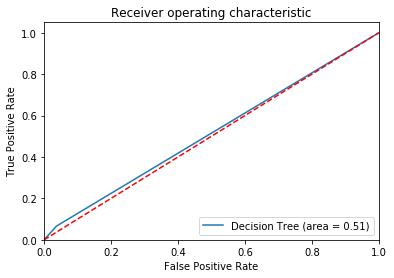

In [293]:
dtree_roc_auc = roc_auc_score(y_test1,prediction)
fpr, tpr, thresholds = roc_curve(y_test1,prediction)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Tuning Decision Tree

1. Max_Depths
This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_scaled, os_data_y1)
    train_pred = dt.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


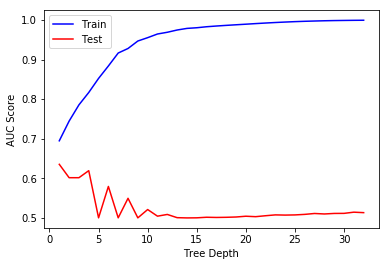

In [270]:
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.show()

We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

2. min_samples_split
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

In [286]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train_scaled, os_data_y1)
    train_pred = dt.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


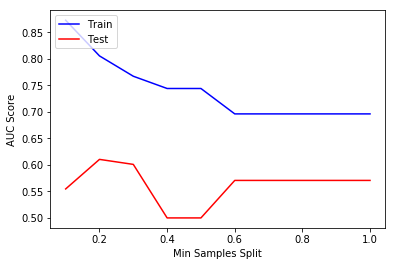

In [294]:
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Split')
plt.show()

We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

3. min_samples_leaf
min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

In [295]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train_scaled, os_data_y1)
    train_pred = dt.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

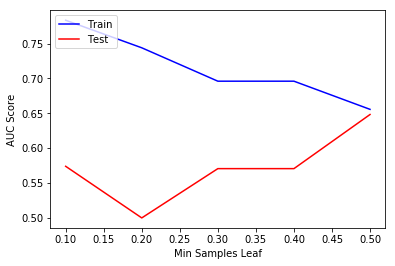

In [296]:
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Leaf')
plt.show()

4. max_features
max_features represents the number of features to consider when looking for the best split.

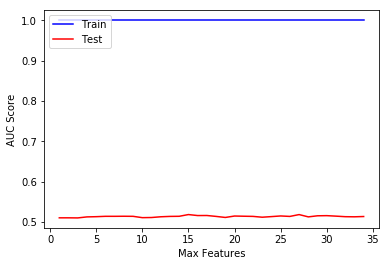

In [304]:
max_features = list(range(1,X_train_scaled.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train_scaled, os_data_y1)
    train_pred = dt.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('Max Features')
plt.show()

### Tuned Decision Tree

0.6545039366332865
              precision    recall  f1-score   support

           0       0.98      0.65      0.79    122507
           1       0.05      0.64      0.10      3616

   micro avg       0.65      0.65      0.65    126123
   macro avg       0.52      0.65      0.44    126123
weighted avg       0.96      0.65      0.77    126123



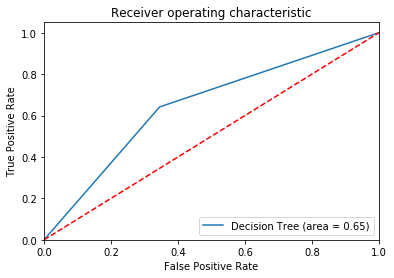

In [312]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(min_samples_split=0.2,max_depth=6,min_samples_leaf=0.5).fit(X_train_scaled, os_data_y1)
prediction = dtree.predict(X_test_scaled)
print(metrics.accuracy_score(y_test1,prediction))
print(metrics.classification_report(y_test1,prediction))
dtree_roc_auc = roc_auc_score(y_test1,prediction)
fpr, tpr, thresholds = roc_curve(y_test1,prediction)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [73]:
#adding graphviz library path to environment variables
import os     
os.environ["PATH"] += os.pathsep + 'F:/Aegis/release/bin/'

#plotting the decision tree
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True,class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("default_predicition_tree.pdf")

## Random Forest

0.9711472134345044
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    122507
           1       0.00      0.00      0.00      3616

   micro avg       0.97      0.97      0.97    126123
   macro avg       0.49      0.50      0.49    126123
weighted avg       0.94      0.97      0.96    126123



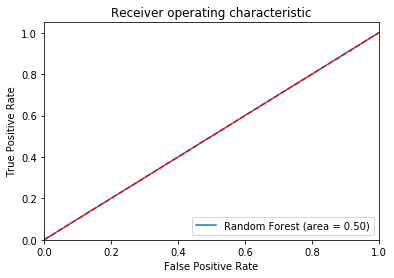

In [314]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train_scaled, os_data_y1)
pred_rf = rf.predict(X_test_scaled)
print(metrics.accuracy_score(y_test1,pred_rf))
print(metrics.classification_report(y_test1,pred_rf))
rf_roc_auc = roc_auc_score(y_test1,pred_rf)
fpr, tpr, thresholds = roc_curve(y_test1,pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Tuning Random Forest

1. N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [318]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]
train_results = []
test_results = []
print("Start of n_estimators {0} rf".format(datetime.datetime.now()))
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state=0).fit(X_train_scaled, os_data_y1)
    train_pred = rf.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
print("End of n_estimators {0} rf".format(datetime.datetime.now()))

Start of n_estimators 2019-02-27 23:19:49.725560 rf
End of n_estimators 2019-02-27 23:40:31.867443 rf


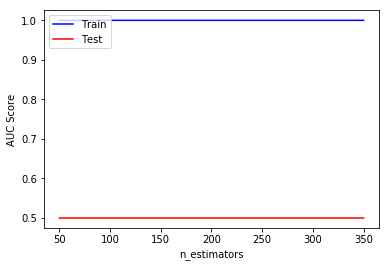

In [ ]:
plt.plot(n_estimators, train_results, 'b', label='Train AUC')
plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

2. max_depth

In [38]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_filtered = X_logr.drop(['sub_grade','id'],axis=1)
grade_mapping={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_filtered["grade"] = X_filtered["grade"].replace(grade_mapping)
X_dummy1 = pd.get_dummies(X_filtered,drop_first=True,prefix_sep='_')
X_dummy1.columns
os1 = SMOTE(random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dummy1, y, test_size=0.3, random_state=0)
columns1 = X_train1.columns
os_data_X1,os_data_y1=os1.fit_sample(X_train1, y_train1)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(os_data_X1)
X_test_scaled = scalar.transform(X_test1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Start of max_depths 2019-02-28 17:43:07.756798 rf
End of max_depths 2019-02-28 18:35:49.602327 rf


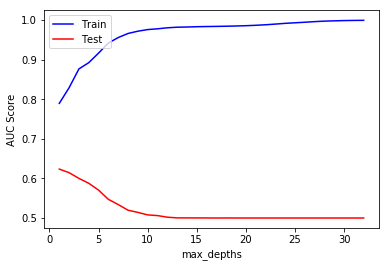

In [26]:
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc,roc_curve
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning) 
%matplotlib inline

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
print("Start of max_depths {0} rf".format(datetime.datetime.now()))
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators=100,max_depth=max_depth, n_jobs=-1,random_state=0).fit(X_train_scaled, os_data_y1)
    train_pred = rf.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
print("End of max_depths {0} rf".format(datetime.datetime.now()))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('max_depths')
plt.show()

3. min_samples_split

Start of min_samples_split 2019-02-28 18:35:50.088095 rf
Start of min_samples_split 2019-02-28 18:40:54.517678 rf


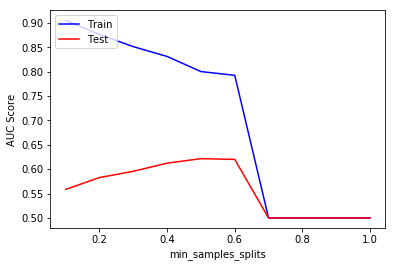

In [27]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
print("Start of min_samples_split {0} rf".format(datetime.datetime.now()))
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators=100,min_samples_split=min_samples_split, n_jobs=-1,random_state=0).fit(X_train_scaled, os_data_y1)
    train_pred = rf.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
print("Start of min_samples_split {0} rf".format(datetime.datetime.now()))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('min_samples_splits')
plt.show()

4. min_samples_leaf

Start of min_samples_leaf 2019-02-28 19:04:35.819253 rf
Start of min_samples_leaf 2019-02-28 19:06:34.848801 rf


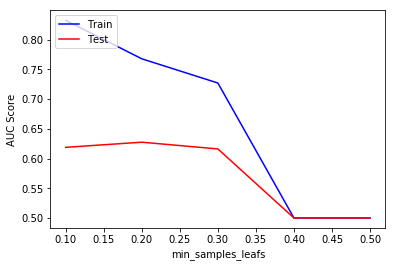

In [30]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
print("Start of min_samples_leaf {0} rf".format(datetime.datetime.now()))
for min_samples_leaf  in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=min_samples_leaf, n_jobs=-1,random_state=0).fit(X_train_scaled, os_data_y1)
    train_pred = rf.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
print("Start of min_samples_leaf {0} rf".format(datetime.datetime.now()))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('min_samples_leafs')
plt.show()

5. max_features

In [ ]:
max_features = list(range(1,X_train_scaled.shape[1]))
train_results = []
test_results = []
print("Start of max_features {0} rf".format(datetime.datetime.now()))
for max_feature in max_features:
    rf = RandomForestClassifier(n_estimators=100,max_features=max_feature, n_jobs=-1,random_state=0).fit(X_train_scaled, os_data_y1)
    train_pred = rf.predict(X_train_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test_scaled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
print("End of max_features {0} rf".format(datetime.datetime.now()))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(["Train","Test"],loc=2)
plt.ylabel('AUC Score')
plt.xlabel('max_features')
plt.show()

### Using GridSearchCV for finding optimal Parameters

In [41]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on above results
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': [25,30,35],
    'min_samples_leaf': [0.20,0.25,0.30],
    'min_samples_split': [0.5,0.6],
    'n_estimators': [50,100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
print("Start of GridSearchCV {0}".format(datetime.datetime.now()))
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
print("End of GridSearchCV {0}".format(datetime.datetime.now()))
#This will try out 1 * 3 * 3 * 3 * 2 * 2 =  108 combinations of settings. 
#We can fit the model, display the best hyperparameters, and evaluate performance:

Start of GridSearchCV 2019-02-28 21:47:44.746727
End of GridSearchCV 2019-02-28 21:47:44.746727


In [42]:
# Fit the grid search to the data
print("Start of GridSearchCV Fitting {0}".format(datetime.datetime.now()))
grid_search.fit(X_train_scaled, os_data_y1)
print("End of GridSearchCV Fitting {0}".format(datetime.datetime.now()))
grid_search.best_params_

Start of GridSearchCV Fitting 2019-02-28 21:47:49.350518
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 116.6min finished


End of GridSearchCV Fitting 2019-02-28 23:45:22.269201


{'bootstrap': True,
 'max_depth': 3,
 'max_features': 25,
 'min_samples_leaf': 0.2,
 'min_samples_split': 0.5,
 'n_estimators': 50}

### Tuned Random Forest

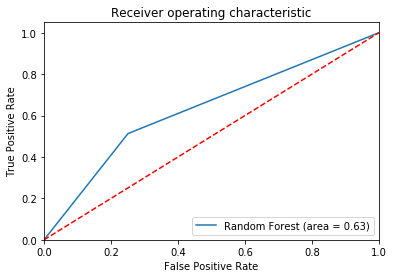

In [50]:
rf_tuned = RandomForestClassifier(max_features=25,min_samples_leaf=0.2,min_samples_split=0.5, max_depth=3,n_jobs=-1,random_state=0).fit(X_train_scaled, os_data_y1)
y_pred = rf_tuned.predict(X_test_scaled)
rf_roc_auc = roc_auc_score(y_test1,y_pred)
fpr, tpr, thresholds = roc_curve(y_test1,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test1,y_pred))
print(metrics.accuracy_score(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85    122507
           1       0.06      0.51      0.10      3616

   micro avg       0.74      0.74      0.74    126123
   macro avg       0.52      0.63      0.48    126123
weighted avg       0.95      0.74      0.83    126123

0.742552904704138


## Inferences

1. Logistic Regression: Accuracy-0.65 , ROC-0.65
2. Decision Tree:       Accuracy-0.65 , ROC-0.65
3. Random Forest:       Accuracy-0.74 , ROC-0.63
    
##### We could see the best results we got were from Random Forest